In [2]:
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
rainfall_data = pd.read_csv('Resource/rainfall in india 1901-2015.csv')
production_data = pd.read_csv('Resource/crop_production.csv')
temperature_data = pd.read_csv('Resource/temperatures.csv')

In [4]:
rainfall_data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [5]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [6]:
rainfall_data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [7]:
len(rainfall_data['YEAR'].unique())

115

In [8]:
len(rainfall_data['SUBDIVISION'].unique())

36

In [9]:
rainfall_data.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,ANDAMAN & NICOBAR ISLANDS,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,ANDAMAN & NICOBAR ISLANDS,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,ANDAMAN & NICOBAR ISLANDS,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,ANDAMAN & NICOBAR ISLANDS,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


In [10]:
rainfall_df = rainfall_data.groupby(['YEAR','SUBDIVISION'],as_index=False, axis=0).sum()

In [11]:
rainfall_df

,YEAR,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1901,ANDAMAN & NICOBAR ISLANDS,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,1901,ASSAM & MEGHALAYA,27.1,19.5,30.6,223.0,207.0,524.9,430.6,464.1,291.4,163.7,115.6,1.2,2498.6,46.6,460.5,1710.9,280.5
2,1901,BIHAR,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,8.3,7.3,0.1,952.3,71.4,78.6,786.7,15.6
3,1901,CHHATTISGARH,48.9,116.5,27.8,5.5,18.4,101.6,381.0,476.7,182.8,27.3,0.4,0.0,1387.0,165.4,51.7,1142.2,27.7
4,1901,COASTAL ANDHRA PRADESH,18.8,80.9,7.2,28.7,68.7,77.7,113.0,133.7,125.3,173.4,164.8,1.5,993.8,99.7,104.6,449.7,339.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,2015,UTTARAKHAND,54.5,62.6,127.3,57.3,38.0,186.6,337.0,305.3,52.6,16.8,2.4,7.2,1247.6,117.0,222.6,881.5,26.4
4112,2015,VIDARBHA,26.3,4.7,66.3,28.1,12.8,254.6,137.2,288.9,167.5,7.0,0.0,0.2,993.8,31.1,107.2,848.2,7.3
4113,2015,WEST MADHYA PRADESH,40.2,6.4,53.5,13.3,2.0,154.1,428.2,276.6,55.6,11.0,0.3,1.0,1042.3,46.6,68.9,914.5,12.4
4114,2015,WEST RAJASTHAN,1.4,0.9,30.3,25.2,15.5,53.2,234.6,60.5,35.7,1.1,0.1,0.0,458.4,2.3,71.0,384.0,1.2


# Temperature data

In [12]:
temperature_data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [13]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


In [14]:
temperature_data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [15]:
len(temperature_data['YEAR'].unique())

117

In [16]:
temperature_data.head(12)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
5,1906,22.28,23.69,27.31,31.93,34.11,32.19,31.01,30.30,29.92,29.55,27.60,24.72,28.73,23.03,31.11,30.86,27.29
6,1907,24.46,24.01,27.04,31.79,32.68,31.92,31.05,29.58,30.67,29.87,27.78,24.44,28.65,24.23,29.92,30.80,27.36
7,1908,23.57,25.26,28.86,32.42,33.02,33.12,30.61,29.55,29.59,29.35,26.88,23.73,28.83,24.42,31.43,30.72,26.64
8,1909,22.67,24.36,29.22,30.79,33.06,31.70,29.81,29.81,30.06,29.25,27.69,23.69,28.38,23.52,31.02,30.33,26.88
9,1910,23.24,25.16,28.48,31.42,33.51,31.84,30.42,29.86,29.82,28.91,26.32,23.37,28.53,24.20,31.14,30.48,26.20


In [17]:
temperature_df =temperature_data.groupby(['YEAR'], as_index=False, axis=0).mean()
temperature_df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


# Production Data

In [18]:
production_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [19]:
production_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [20]:
production_data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [21]:
len(production_data['Area'].unique())

38442

In [22]:
len(production_data['Crop_Year'].unique())

19

In [23]:
rainfall_df.drop(['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec'], axis= 1, inplace= True)

In [24]:
temperature_df.drop(['JAN-FEB','MAR-MAY','JUN-SEP','OCT-DEC'], axis= 1, inplace= True)
rainfall_df.drop(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], axis = 1, inplace = True)

In [25]:
rainfall_df.rename({'ANNUAL': 'Rainfall (mm)'}, axis=1, inplace=True)

In [26]:
temperature_df.rename({'ANNUAL': 'Temperature (Celsius)'}, axis=1, inplace=True)

In [27]:
production_data.rename({'State_Name': 'SUBDIVISION', 'Crop_Year': 'YEAR'}, axis=1, inplace=True)

In [28]:
production_data['SUBDIVISION'] = production_data['SUBDIVISION'].apply(lambda x: x.upper())

In [29]:
rainfall_df['SUBDIVISION'] = rainfall_df['SUBDIVISION'].apply(lambda x: x.replace('&', 'AND'))

In [30]:
rainfall_df['SUBDIVISION'] = rainfall_df['SUBDIVISION'].apply(lambda x: x.replace('ASSAM AND MEGHALAYA', 'ASSAM'))

In [31]:
rain_temp_df = pd.merge(rainfall_df, temperature_df, on=['YEAR'])

In [32]:
rain_temp_prod_df = pd.merge(rain_temp_df, production_data, on=['SUBDIVISION', 'YEAR'])

In [33]:
rain_temp_prod_df

,YEAR,SUBDIVISION,Rainfall (mm),JAN,FEB,MAR,APR,MAY,JUN,JUL,...,SEP,OCT,NOV,DEC,Temperature (Celsius),District_Name,Season,Crop,Area,Production
0,1997,ARUNACHAL PRADESH,2274.9,23.30,25.96,29.44,31.00,33.36,33.07,31.87,...,31.11,29.21,26.87,23.92,29.05,CHANGLANG,Kharif,Maize,1520.0,2725.0
1,1997,ARUNACHAL PRADESH,2274.9,23.30,25.96,29.44,31.00,33.36,33.07,31.87,...,31.11,29.21,26.87,23.92,29.05,CHANGLANG,Kharif,Rice,11500.0,13800.0
2,1997,ARUNACHAL PRADESH,2274.9,23.30,25.96,29.44,31.00,33.36,33.07,31.87,...,31.11,29.21,26.87,23.92,29.05,CHANGLANG,Kharif,Sesamum,424.0,313.0
3,1997,ARUNACHAL PRADESH,2274.9,23.30,25.96,29.44,31.00,33.36,33.07,31.87,...,31.11,29.21,26.87,23.92,29.05,CHANGLANG,Kharif,Small millets,2000.0,1500.0
4,1997,ARUNACHAL PRADESH,2274.9,23.30,25.96,29.44,31.00,33.36,33.07,31.87,...,31.11,29.21,26.87,23.92,29.05,CHANGLANG,Kharif,Soyabean,373.0,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76603,2014,UTTARAKHAND,1287.4,23.83,25.97,28.95,32.74,33.77,34.15,31.85,...,30.68,30.29,28.05,25.08,29.72,UTTAR KASHI,Whole Year,Onion,26.0,172.0
76604,2014,UTTARAKHAND,1287.4,23.83,25.97,28.95,32.74,33.77,34.15,31.85,...,30.68,30.29,28.05,25.08,29.72,UTTAR KASHI,Whole Year,Pulses total,5346.0,4630.0
76605,2014,UTTARAKHAND,1287.4,23.83,25.97,28.95,32.74,33.77,34.15,31.85,...,30.68,30.29,28.05,25.08,29.72,UTTAR KASHI,Whole Year,Rice,9919.0,16499.0
76606,2014,UTTARAKHAND,1287.4,23.83,25.97,28.95,32.74,33.77,34.15,31.85,...,30.68,30.29,28.05,25.08,29.72,UTTAR KASHI,Whole Year,Sunflower,3.0,3.0


In [34]:
data = rain_temp_prod_df[['YEAR','SUBDIVISION','Rainfall (mm)','Temperature (Celsius)','District_Name','Season','Crop','Area','Production']]

In [35]:
data

,YEAR,SUBDIVISION,Rainfall (mm),Temperature (Celsius),District_Name,Season,Crop,Area,Production
0,1997,ARUNACHAL PRADESH,2274.9,29.05,CHANGLANG,Kharif,Maize,1520.0,2725.0
1,1997,ARUNACHAL PRADESH,2274.9,29.05,CHANGLANG,Kharif,Rice,11500.0,13800.0
2,1997,ARUNACHAL PRADESH,2274.9,29.05,CHANGLANG,Kharif,Sesamum,424.0,313.0
3,1997,ARUNACHAL PRADESH,2274.9,29.05,CHANGLANG,Kharif,Small millets,2000.0,1500.0
4,1997,ARUNACHAL PRADESH,2274.9,29.05,CHANGLANG,Kharif,Soyabean,373.0,450.0
...,...,...,...,...,...,...,...,...,...
76603,2014,UTTARAKHAND,1287.4,29.72,UTTAR KASHI,Whole Year,Onion,26.0,172.0
76604,2014,UTTARAKHAND,1287.4,29.72,UTTAR KASHI,Whole Year,Pulses total,5346.0,4630.0
76605,2014,UTTARAKHAND,1287.4,29.72,UTTAR KASHI,Whole Year,Rice,9919.0,16499.0
76606,2014,UTTARAKHAND,1287.4,29.72,UTTAR KASHI,Whole Year,Sunflower,3.0,3.0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76608 entries, 0 to 76607
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   76608 non-null  int64  
 1   SUBDIVISION            76608 non-null  object 
 2   Rainfall (mm)          76608 non-null  float64
 3   Temperature (Celsius)  76608 non-null  float64
 4   District_Name          76608 non-null  object 
 5   Season                 76608 non-null  object 
 6   Crop                   76608 non-null  object 
 7   Area                   76608 non-null  float64
 8   Production             75569 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 5.8+ MB


In [37]:
data.describe()

,YEAR,Rainfall (mm),Temperature (Celsius),Area,Production
count,76608.000000,76608.00000,76608.000000,76608.000000,7.556900e+04
mean,2005.822094,1480.22635,29.841077,7559.423619,1.508659e+06
std,4.917583,717.83620,0.249317,27635.754748,2.885153e+07
min,1997.000000,274.70000,29.050000,0.040000,0.000000e+00
25%,2002.000000,1032.40000,29.750000,64.000000,6.900000e+01
50%,2006.000000,1287.20000,29.810000,429.000000,5.630000e+02
75%,2010.000000,1898.60000,29.990000,2645.000000,4.872000e+03
max,2014.000000,3616.70000,30.300000,545965.000000,1.250800e+09


In [38]:
data['SUBDIVISION'].nunique()


11

In [39]:
data['YEAR'].nunique()

18

# DATA EXPLORATION

RAINFALL DATA

In [40]:
rainfall_df

,YEAR,SUBDIVISION,Rainfall (mm)
0,1901,ANDAMAN AND NICOBAR ISLANDS,3373.2
1,1901,ASSAM,2498.6
2,1901,BIHAR,952.3
3,1901,CHHATTISGARH,1387.0
4,1901,COASTAL ANDHRA PRADESH,993.8
...,...,...,...
4111,2015,UTTARAKHAND,1247.6
4112,2015,VIDARBHA,993.8
4113,2015,WEST MADHYA PRADESH,1042.3
4114,2015,WEST RAJASTHAN,458.4


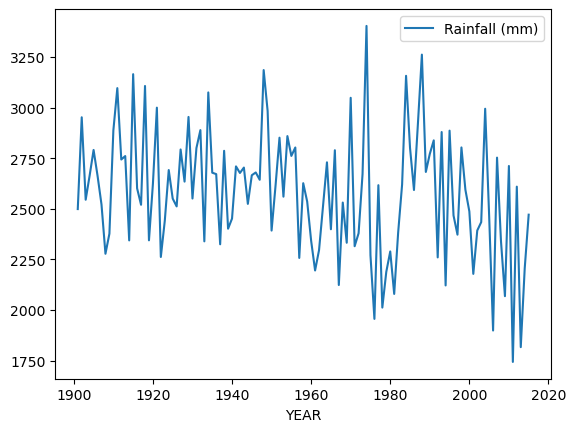

In [41]:
rainfall_df.loc[rainfall_df['SUBDIVISION'] == 'ASSAM'].groupby('YEAR').mean().plot()
plt.show()

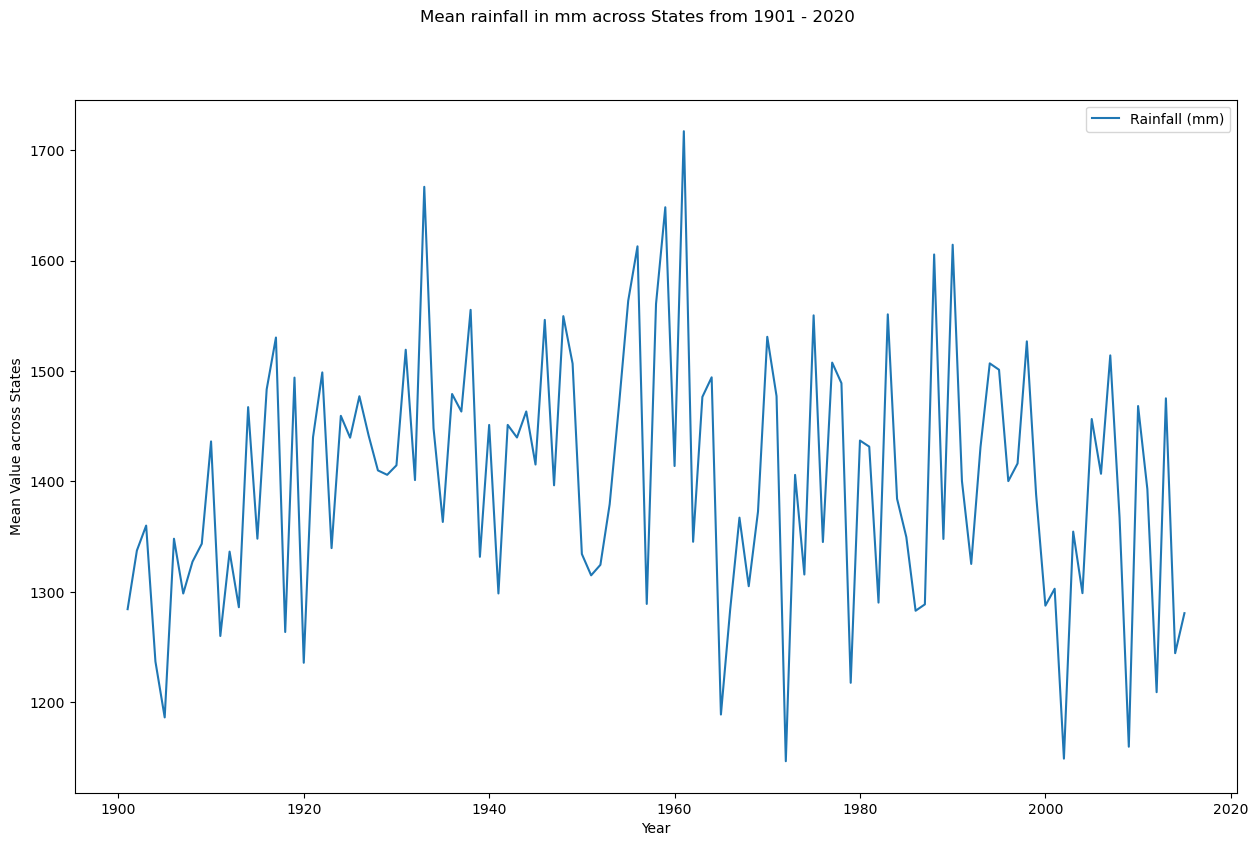

In [42]:
rain_data = rainfall_df.groupby('YEAR').mean()

#SUBPLOTS
fig,ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean rainfall in mm across States from 1901 - 2020')

rain_data.plot(ax=ax)
ax.set_ylabel('Mean Value across States')
ax.set_xlabel('Year')

plt.show()

TEMPERATURE DATA

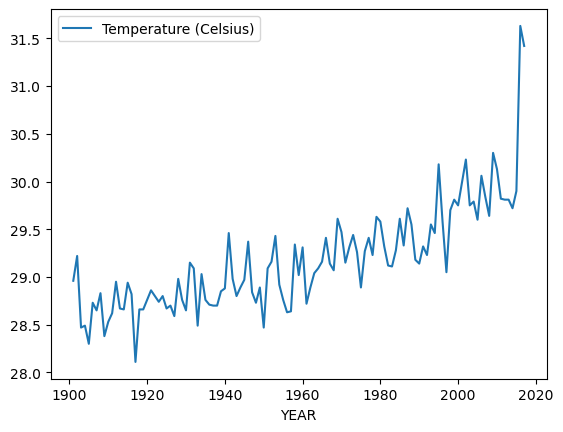

In [43]:
temperature_df.plot('YEAR','Temperature (Celsius)')
plt.show()

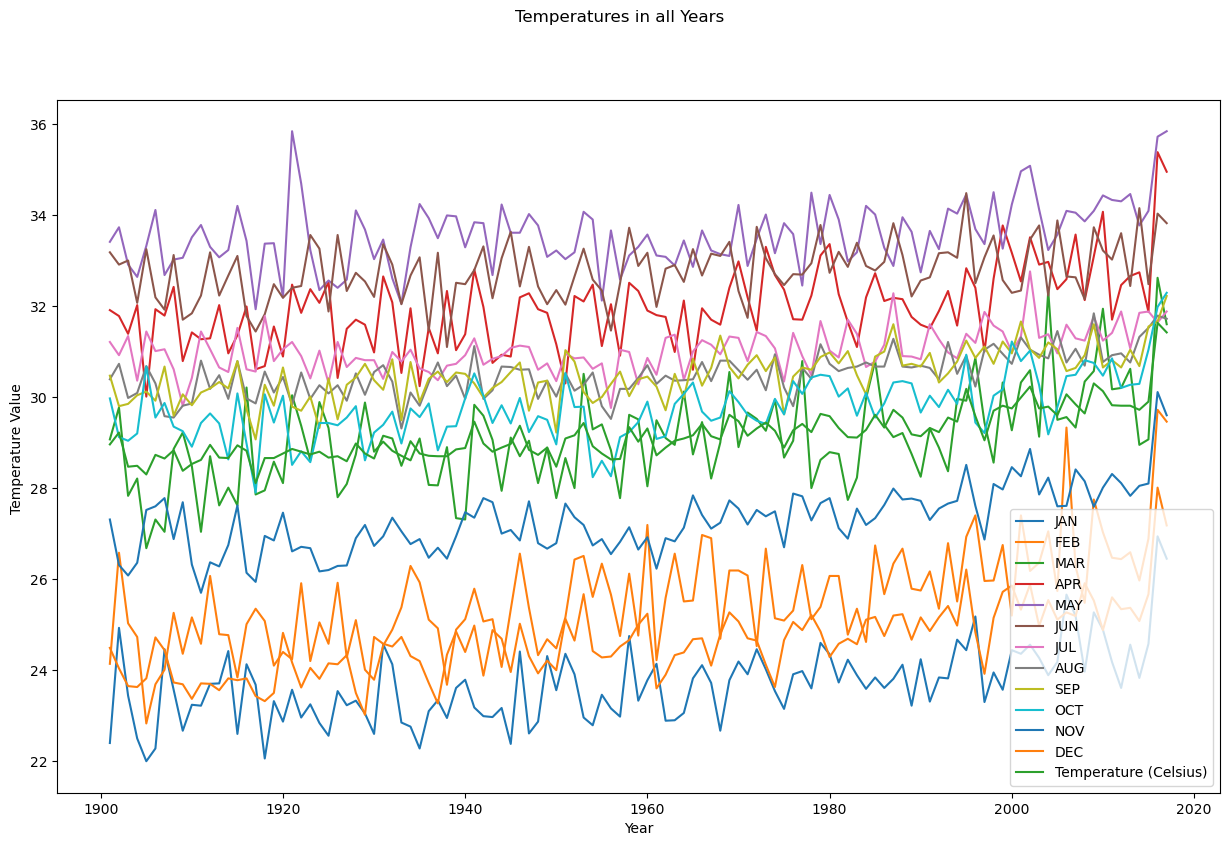

In [44]:
temp_data = temperature_df.groupby('YEAR').mean()

#SUBPLOTS
fig,ax = plt.subplots(figsize=(15,9))
fig.suptitle('Temperatures in all Years')

temp_data.plot(ax=ax)

ax.set_ylabel('Temperature Value ')
ax.set_xlabel('Year')

plt.show()



PRODUCTION DATA

In [45]:
production_data 

,SUBDIVISION,District_Name,YEAR,Season,Crop,Area,Production
0,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,ANDAMAN AND NICOBAR ISLANDS,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,WEST BENGAL,PURULIA,2014,Summer,Rice,306.0,801.0
246087,WEST BENGAL,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,WEST BENGAL,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,WEST BENGAL,PURULIA,2014,Winter,Rice,279151.0,597899.0


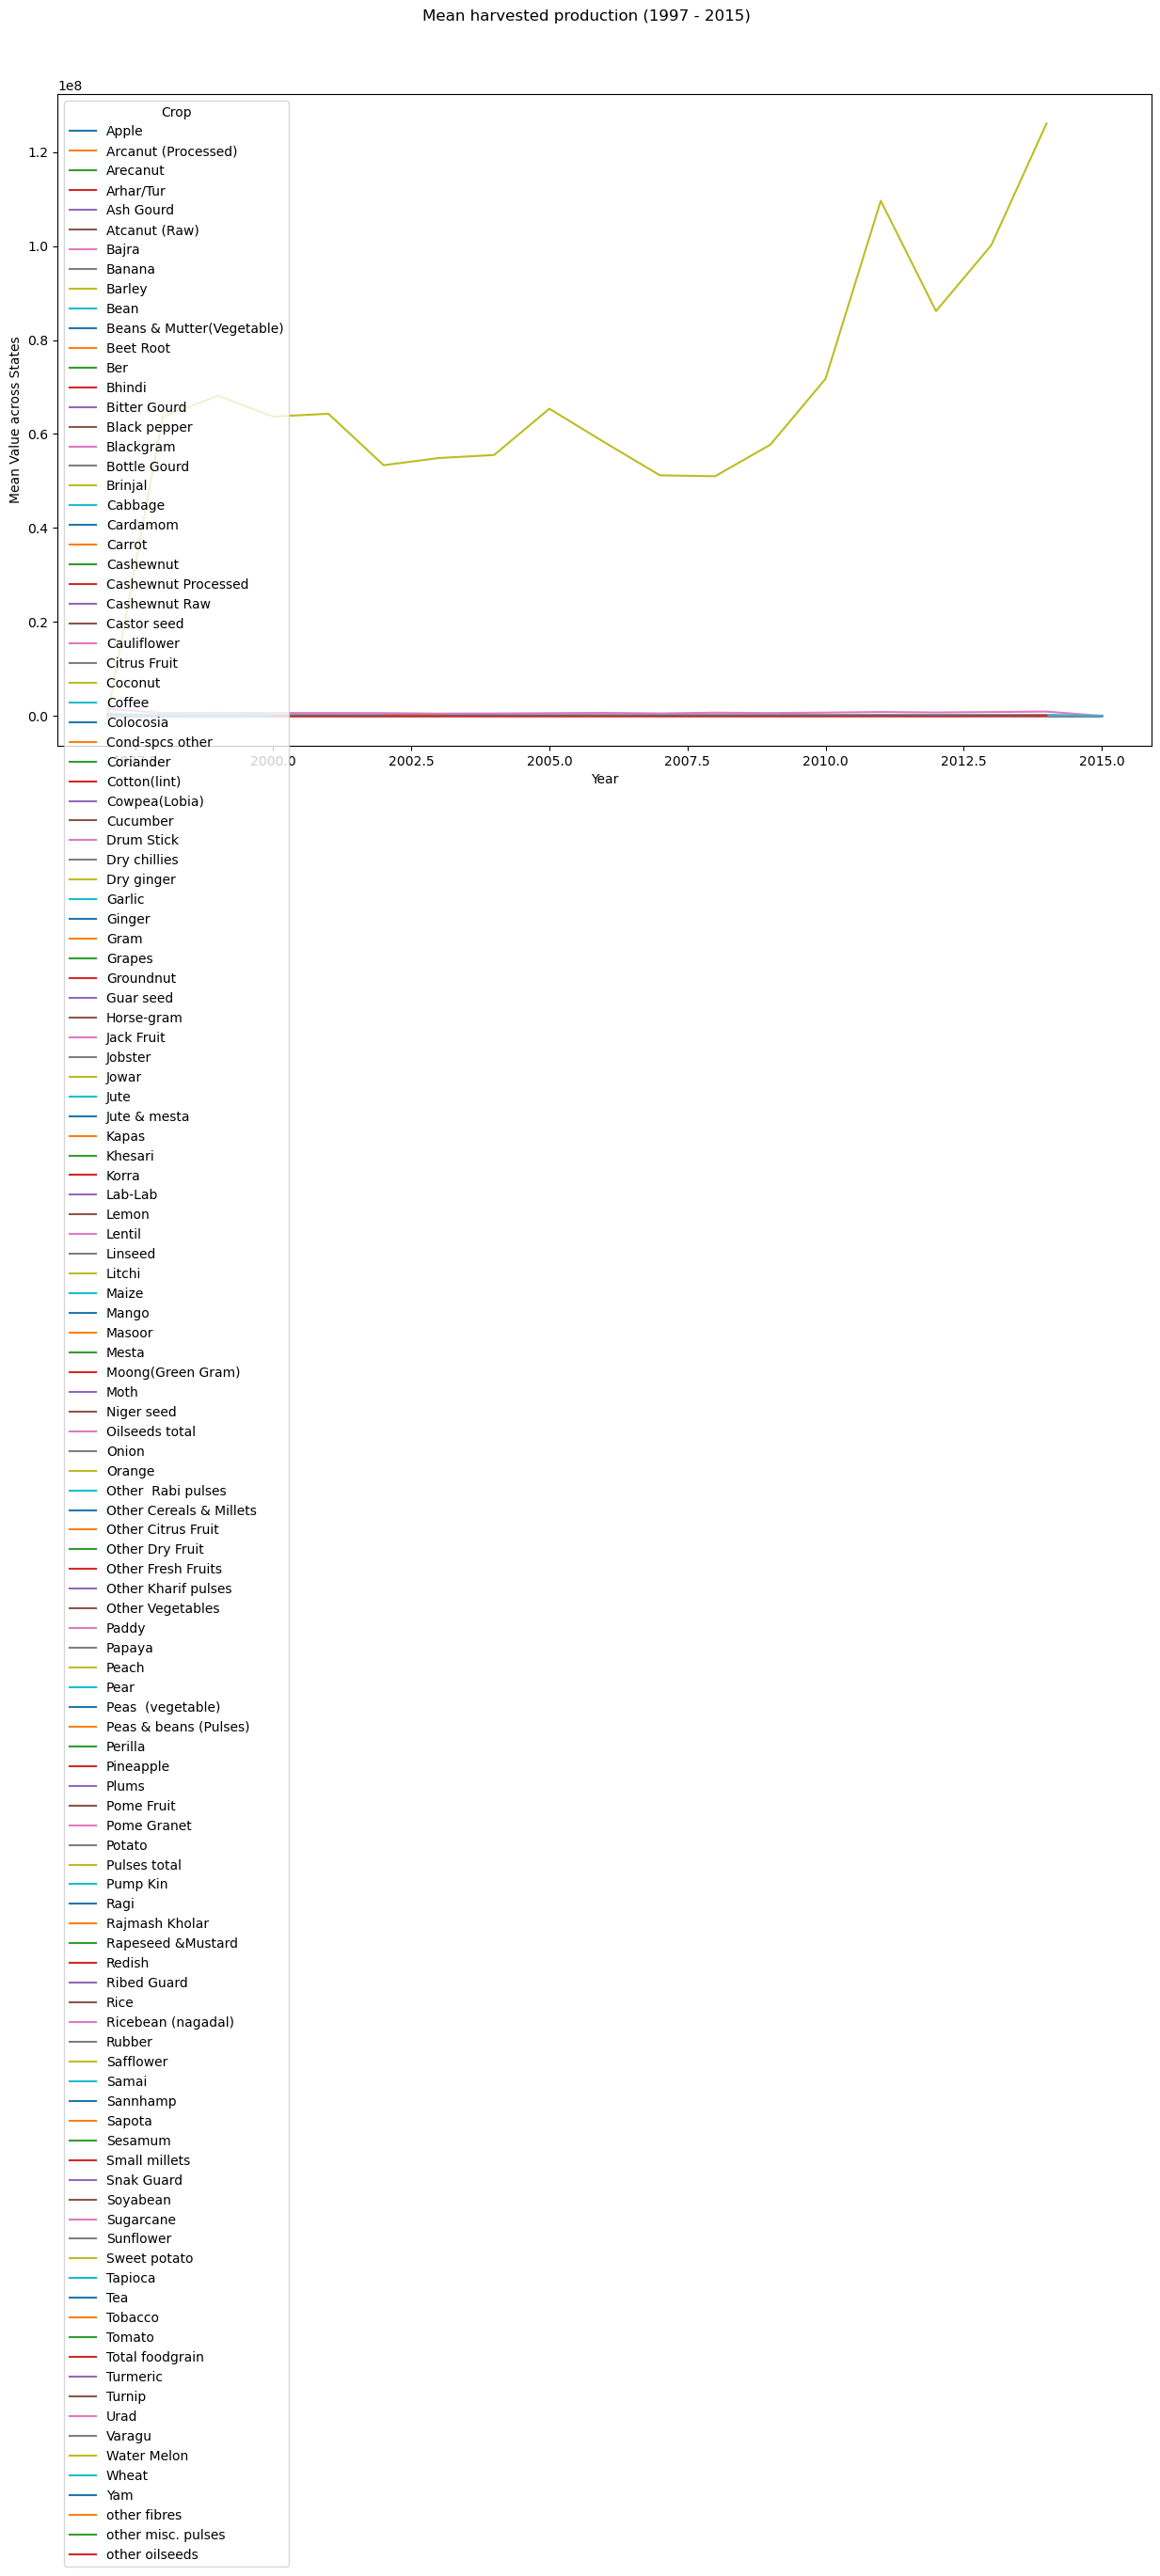

In [46]:
prod_mean = production_data.groupby(['YEAR','Crop']).mean()

#SUBPLOTS
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested production (1997 - 2015)')

prod_mean['Production'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across States')
ax.set_xlabel('Year')

plt.show()
   

In [47]:
data[data['Production'] == data['Production'].max()]

,YEAR,SUBDIVISION,Rainfall (mm),Temperature (Celsius),District_Name,Season,Crop,Area,Production
62620,2011,TAMIL NADU,926.5,29.82,COIMBATORE,Whole Year,Coconut,82704.0,1.250800e+09


MERGED DATA

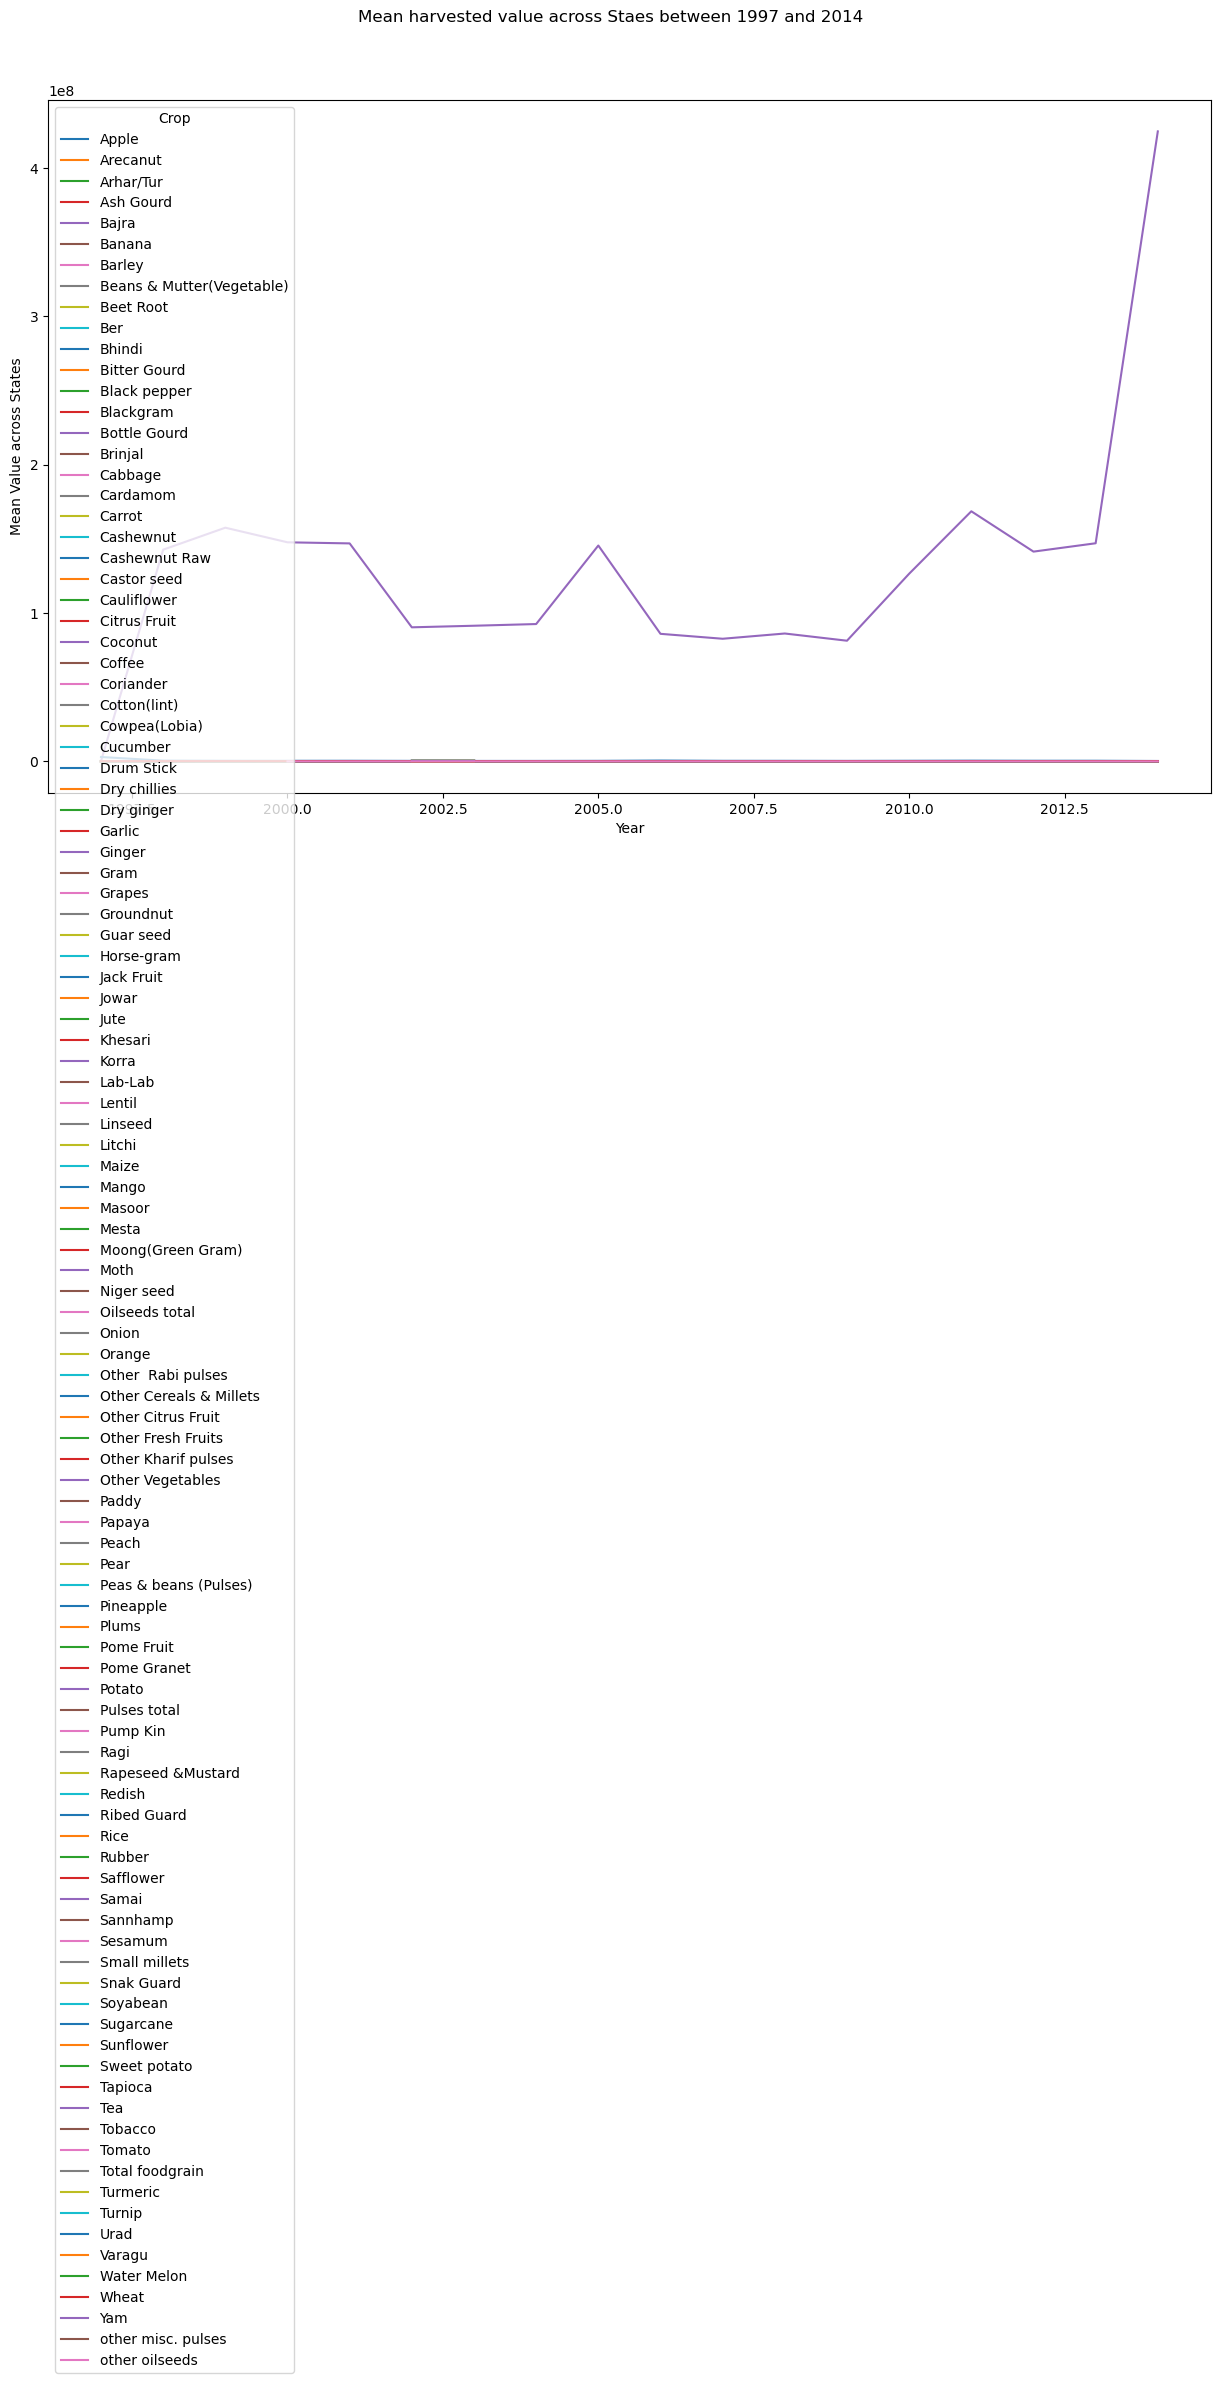

In [48]:
# prepare data
temp_data = data.groupby(['YEAR', 'Crop']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across Staes between 1997 and 2014')

temp_data['Production'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across States')
ax.set_xlabel('Year')

plt.show()

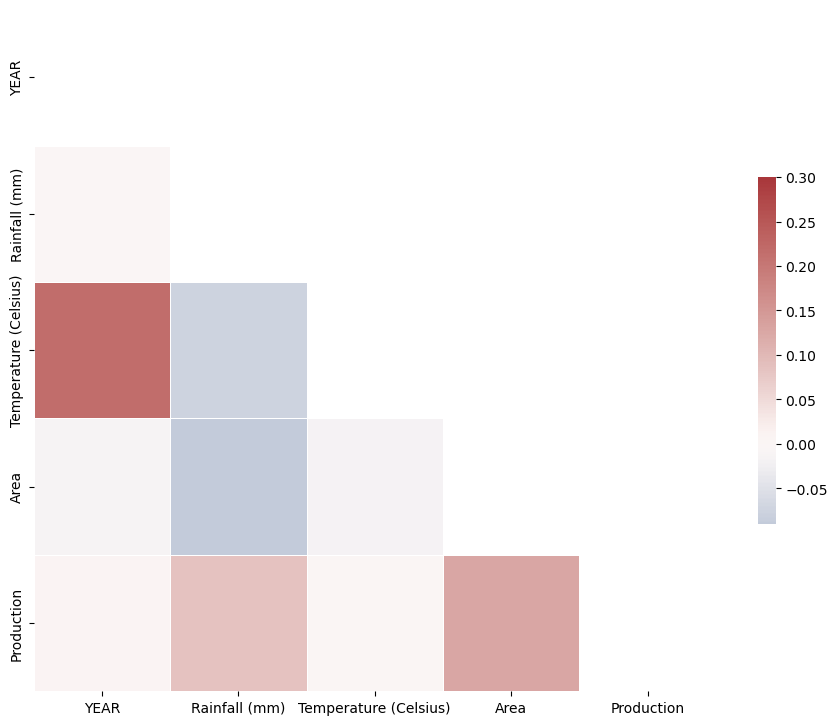

In [49]:
corr = data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [50]:
data

,YEAR,SUBDIVISION,Rainfall (mm),Temperature (Celsius),District_Name,Season,Crop,Area,Production
0,1997,ARUNACHAL PRADESH,2274.9,29.05,CHANGLANG,Kharif,Maize,1520.0,2725.0
1,1997,ARUNACHAL PRADESH,2274.9,29.05,CHANGLANG,Kharif,Rice,11500.0,13800.0
2,1997,ARUNACHAL PRADESH,2274.9,29.05,CHANGLANG,Kharif,Sesamum,424.0,313.0
3,1997,ARUNACHAL PRADESH,2274.9,29.05,CHANGLANG,Kharif,Small millets,2000.0,1500.0
4,1997,ARUNACHAL PRADESH,2274.9,29.05,CHANGLANG,Kharif,Soyabean,373.0,450.0
...,...,...,...,...,...,...,...,...,...
76603,2014,UTTARAKHAND,1287.4,29.72,UTTAR KASHI,Whole Year,Onion,26.0,172.0
76604,2014,UTTARAKHAND,1287.4,29.72,UTTAR KASHI,Whole Year,Pulses total,5346.0,4630.0
76605,2014,UTTARAKHAND,1287.4,29.72,UTTAR KASHI,Whole Year,Rice,9919.0,16499.0
76606,2014,UTTARAKHAND,1287.4,29.72,UTTAR KASHI,Whole Year,Sunflower,3.0,3.0


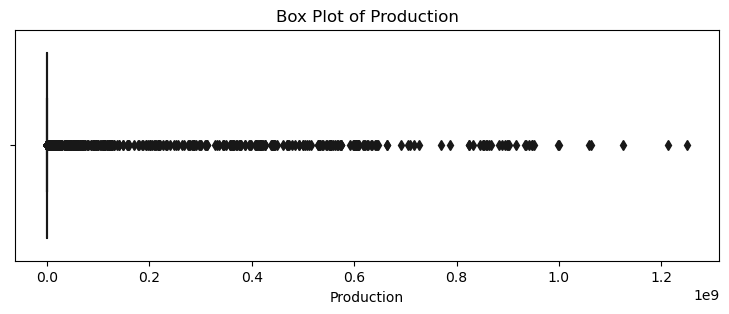

In [51]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=data['Production'],color='#005030')
plt.title(f'Box Plot of Production')
plt.show()

In [52]:
data

,YEAR,SUBDIVISION,Rainfall (mm),Temperature (Celsius),District_Name,Season,Crop,Area,Production
0,1997,ARUNACHAL PRADESH,2274.9,29.05,CHANGLANG,Kharif,Maize,1520.0,2725.0
1,1997,ARUNACHAL PRADESH,2274.9,29.05,CHANGLANG,Kharif,Rice,11500.0,13800.0
2,1997,ARUNACHAL PRADESH,2274.9,29.05,CHANGLANG,Kharif,Sesamum,424.0,313.0
3,1997,ARUNACHAL PRADESH,2274.9,29.05,CHANGLANG,Kharif,Small millets,2000.0,1500.0
4,1997,ARUNACHAL PRADESH,2274.9,29.05,CHANGLANG,Kharif,Soyabean,373.0,450.0
...,...,...,...,...,...,...,...,...,...
76603,2014,UTTARAKHAND,1287.4,29.72,UTTAR KASHI,Whole Year,Onion,26.0,172.0
76604,2014,UTTARAKHAND,1287.4,29.72,UTTAR KASHI,Whole Year,Pulses total,5346.0,4630.0
76605,2014,UTTARAKHAND,1287.4,29.72,UTTAR KASHI,Whole Year,Rice,9919.0,16499.0
76606,2014,UTTARAKHAND,1287.4,29.72,UTTAR KASHI,Whole Year,Sunflower,3.0,3.0


# Data Preprocessing

One hot Encoding

In [53]:
data.shape

(76608, 9)

In [54]:
from sklearn.preprocessing import OneHotEncoder

df_onehot = pd.get_dummies(data, columns=['SUBDIVISION', 'Crop', 'District_Name', 'Season'], prefix=['SUBDIVISION', 'Crop', 'District_Name', 'Season'])
data = df_onehot.loc[:, df_onehot.columns != 'Production']
data['Production'] = df_onehot['Production']

In [55]:
data.shape

(76608, 357)

Backward Elimination

In [56]:
data

,YEAR,Rainfall (mm),Temperature (Celsius),Area,SUBDIVISION_ANDAMAN AND NICOBAR ISLANDS,SUBDIVISION_ARUNACHAL PRADESH,SUBDIVISION_ASSAM,SUBDIVISION_BIHAR,SUBDIVISION_CHHATTISGARH,SUBDIVISION_HIMACHAL PRADESH,...,District_Name_WEST KAMENG,District_Name_WEST SIANG,District_Name_WEST SINGHBHUM,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Production
0,1997,2274.9,29.05,1520.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2725.0
1,1997,2274.9,29.05,11500.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,13800.0
2,1997,2274.9,29.05,424.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,313.0
3,1997,2274.9,29.05,2000.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1500.0
4,1997,2274.9,29.05,373.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76603,2014,1287.4,29.72,26.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,172.0
76604,2014,1287.4,29.72,5346.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4630.0
76605,2014,1287.4,29.72,9919.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,16499.0
76606,2014,1287.4,29.72,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3.0


In [57]:
import statsmodels.api as sm

y = data['Production']
X = data.drop('Production', axis=1)

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

data = data[cols]
data.insert(len(data.columns), 'Production', y)

In [58]:
data.shape

(76608, 357)

OUTLIER REMOVAL

In [59]:
from scipy import stats

y = data['Production']
X = data.drop('Production', axis=1)

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 15).all(axis=1)
X = X[filtered_entries]

X.insert(len(X.columns), 'Production', y)
data = X

In [60]:
data.shape

(55748, 357)

Feature Scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler

y = data['Production']
X = data.drop('Production', axis=1)

scaler = MinMaxScaler()
data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
data_without_yield.columns = X.columns
data_without_yield.insert(len(data_without_yield.columns), 'Production', y)

data = data_without_yield

In [62]:
data.shape

(55748, 357)

In [63]:
data = data[np.isfinite(data).all(1)]

# Modeling

In [64]:
y = data['Production']
X = data.drop('Production', axis=1)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [67]:
def plot_regression_results(ax, y_test, y_pred, title, estimated_time, scores):

  # linear least-squares
  slope, intercept, rvalue, pvalue, stderr = linregress(y_test, y_pred)
  ax.plot([y_test.min(), y_test.max()], [intercept+y_test.min()*slope, intercept+y_test.max()*slope], '--r')

  ax.scatter(y_test, y_pred, alpha=0.7)


  extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
  ax.legend([extra], [scores], loc='upper left')

  ax.set_xlabel('Actual values in tonnes')
  ax.set_ylabel('Predictes values in tonnes')
  ax.set_title('{}\nTrained in {:.2f} Milliseconds'.format(name, estimated_time*1000))

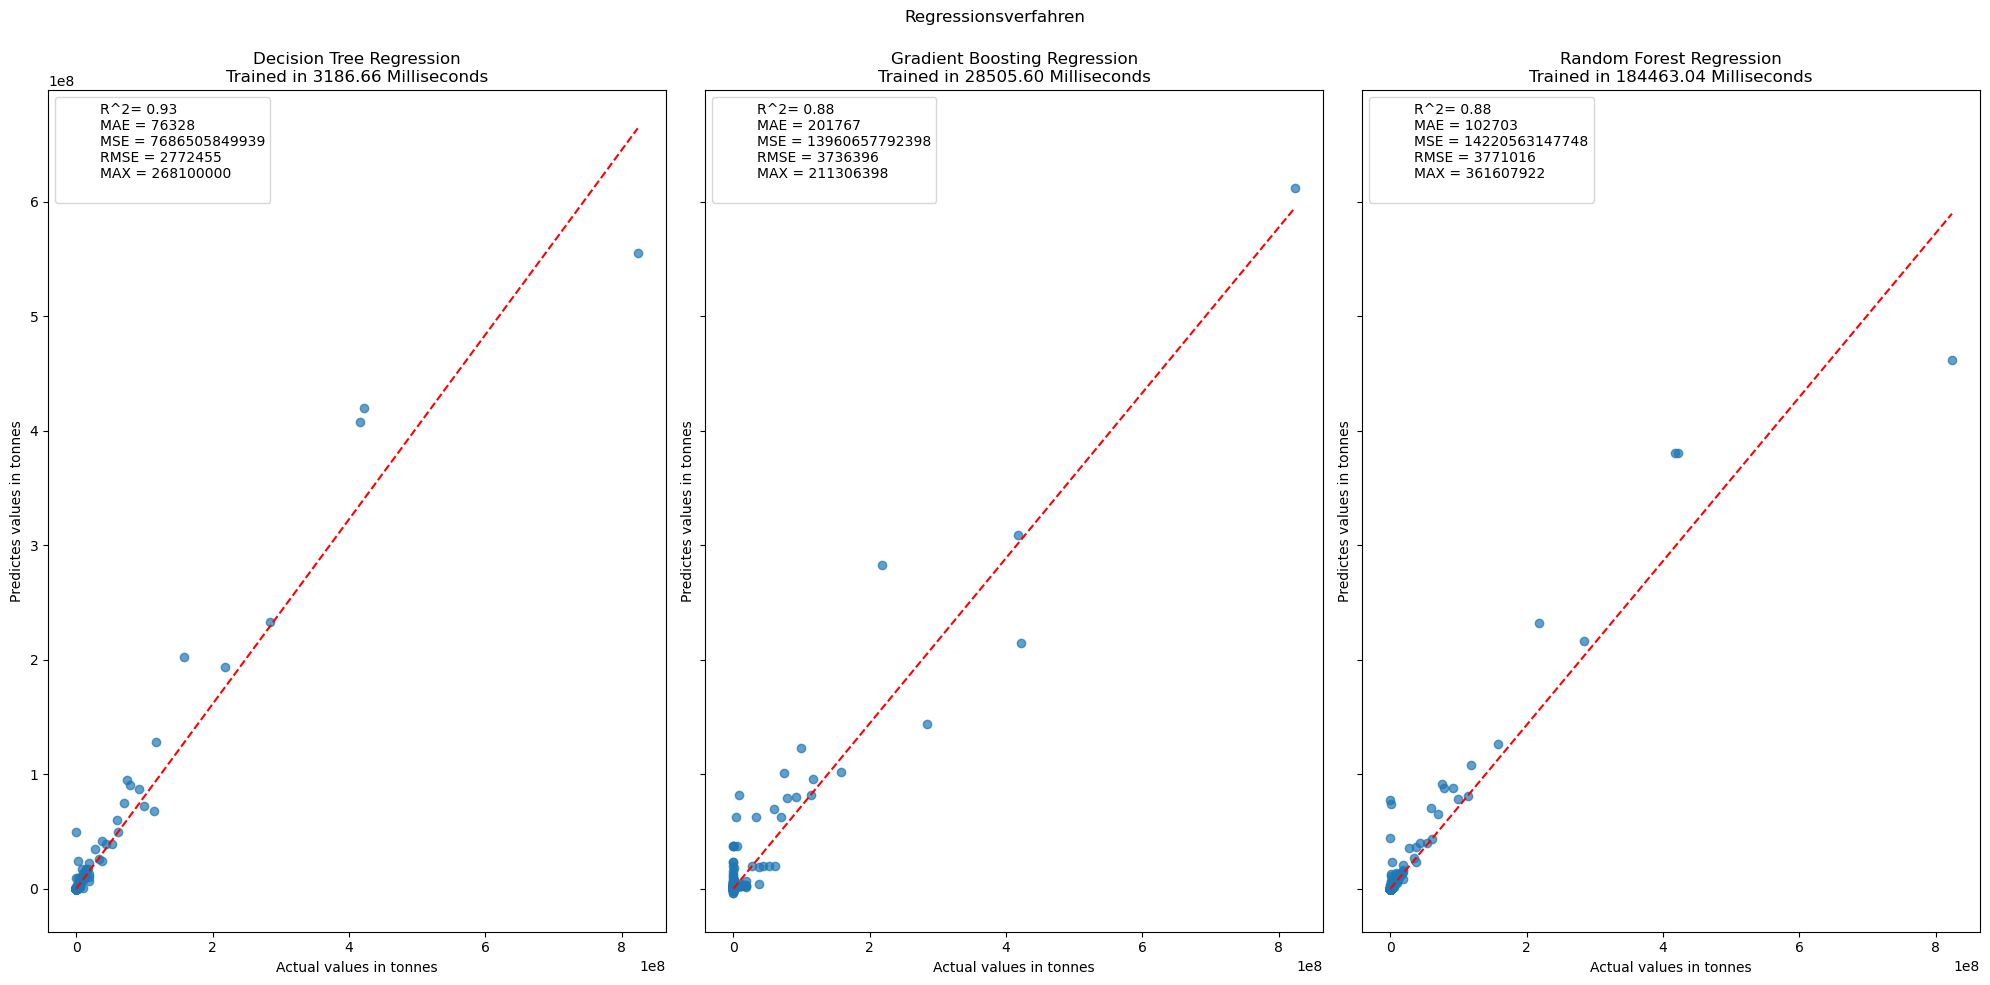

In [71]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

import time
from scipy.stats import linregress

dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()


estimators = [('Decision Tree Regression', dtr),
              ('Gradient Boosting Regression', gbr),
              ('Random Forest Regression', rfr)]

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(20, 10))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
  start_time = time.time()

  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  estimated_time = time.time() - start_time

  plot_regression_results(ax, y_test, y_pred, name, estimated_time, 
                          (r'R^2= {:.2f}' + '\n' + 
                          r'MAE = {:.0f}' + '\n' +
                          r'MSE = {:.0f}' + '\n' +
                          r'RMSE = {:.0f}' + '\n' +
                          r'MAX = {:.0f}' + '\n'
                          )
                          .format(r2_score(y_test, y_pred),
                                  mean_absolute_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred, squared=False),
                                  max_error(y_test, y_pred),
                                  ))
  
plt.suptitle('Regressionsverfahren')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

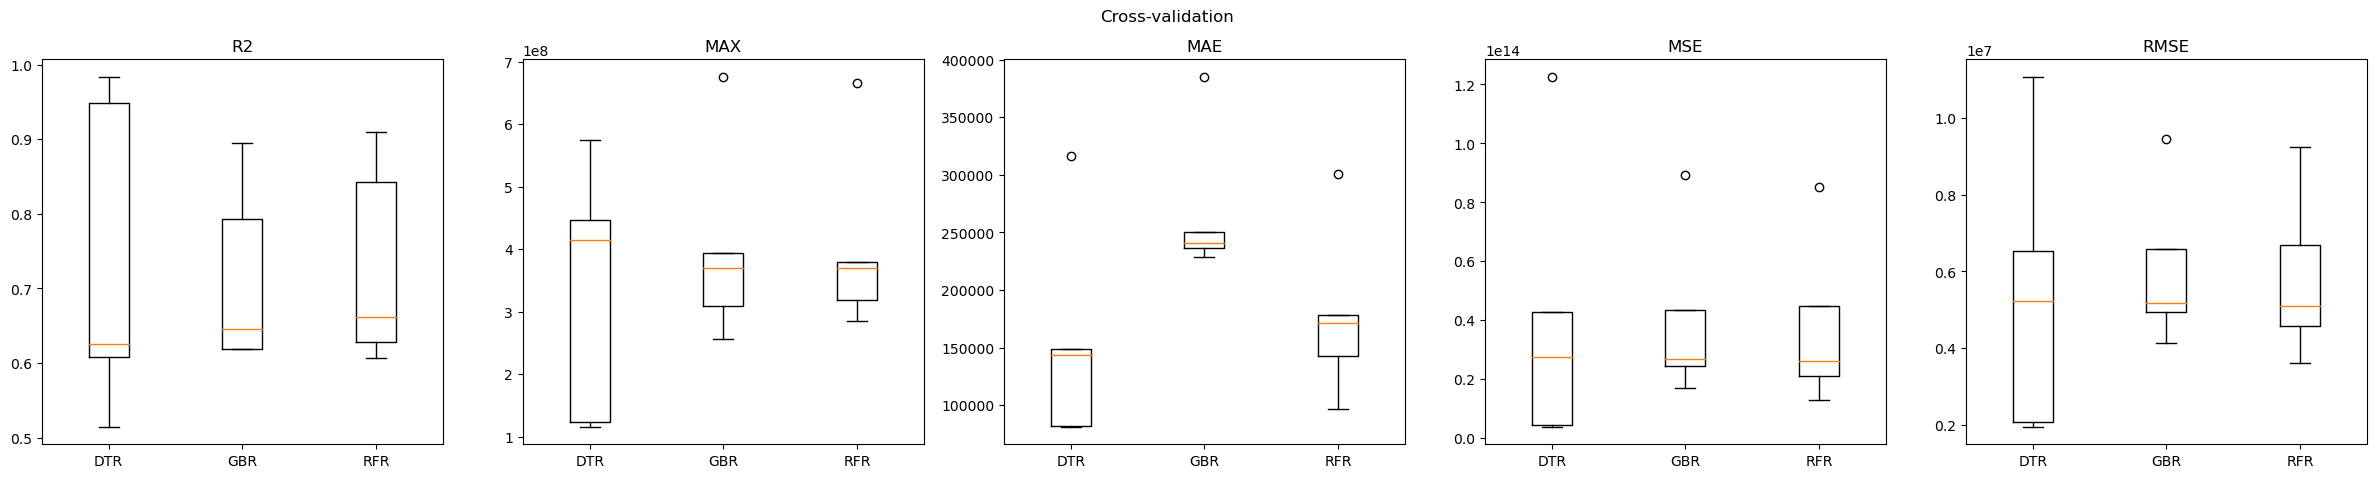

In [69]:
r2_values = []
max_error_values = []
neg_mean_absolute_error_values = []
neg_mean_squared_error_values = []
neg_root_mean_squared_error_values = []

for name, est in estimators:
  score = cross_validate(est, X_train, y_train, cv=5,
                         scoring=['r2', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                         n_jobs=-1)

  r2_values.append(score['test_r2'])
  max_error_values.append(-score['test_max_error'])
  neg_mean_absolute_error_values.append(-score['test_neg_mean_absolute_error'])
  neg_mean_squared_error_values.append(-score['test_neg_mean_squared_error'])
  neg_root_mean_squared_error_values.append(-score['test_neg_root_mean_squared_error'])

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

names = ['DTR', 'GBR', 'RFR']

axs[0].boxplot(r2_values, labels=names)
axs[0].set_title('R2')
axs[1].boxplot(max_error_values, labels=names)
axs[1].set_title('MAX')
axs[2].boxplot(neg_mean_absolute_error_values, labels=names)
axs[2].set_title('MAE')
axs[3].boxplot(neg_mean_squared_error_values, labels=names)
axs[3].set_title('MSE')
axs[4].boxplot(neg_root_mean_squared_error_values, labels=names)
axs[4].set_title('RMSE')

plt.suptitle('Cross-validation')
plt.show()

In [94]:
regression = 2

print(u'R²: {:.3f} \u00B1 {:.3f}'.format(np.mean(r2_values[regression]), np.std(r2_values[regression])))
print(u'MAX: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(max_error_values[regression]), np.std(max_error_values[regression])))
print(u'MAE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_absolute_error_values[regression]), np.std(neg_mean_absolute_error_values[regression])))
print(u'MSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_squared_error_values[regression]), np.std(neg_mean_squared_error_values[regression])))
print(u'RMSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_root_mean_squared_error_values[regression]), np.std(neg_root_mean_squared_error_values[regression])))
     

R²: 0.730 ± 0.122
MAX: 403,990,206 ± 135,718,539
MAE: 177,913 ± 67,867
MSE: 38,033,794,691,982 ± 25,865,757,156,381
RMSE: 5,844,247 ± 1,969,407
